In [10]:
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [20]:
#extracting the dataset
#files = zf.ZipFile("Documents/photos_crime_detection.zip", 'r')
#files.extractall('Documents/CRIME_DETECTION_IMAGES')
#files.close()

In [20]:
PIL.Image.open("Documents/CRIME_DETECTION_IMAGES/Test/Vandalism/Vandalism007_x264_0.png")
van_img = cv2.imread("Documents/CRIME_DETECTION_IMAGES/Test/Vandalism/Vandalism007_x264_0.png")
print(van_img.shape)

(64, 64, 3)


In [18]:
#loading the dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory='Documents/CRIME_DETECTION_IMAGES/Train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(64,64))
validation_ds = keras.utils.image_dataset_from_directory(
    directory='Documents/CRIME_DETECTION_IMAGES/Test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(64,64))

Found 1266345 files belonging to 14 classes.
Found 111308 files belonging to 14 classes.


In [29]:
class_names = ["Abuse","Arrest","Arson","Assault","Burglary","Explosion","Fighting","NormalVideos",
               "RoadAccidents","Robbery","Shooting","Shoplifting","Stealing","Vandalism"]

In [14]:
resnet_50_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64,64,3),
    pooling='max',
    classes=14,
)
for layer in pretrained_model.layers:
    layer.trainable = False
resnet_50_model.add(pretrained_model)
resnet_50_model.add(Flatten())
resnet_50_model.add(Dense(50,activation = 'relu'))
resnet_50_model.add(Dense(14,activation = 'softmax'))

In [15]:
resnet_50_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 14)               7182      
 pper)                                                           
                                                                 
Total params: 24,643,982
Trainable params: 1,056,270
Non-trainable params: 23,587,712
__________________________________

In [16]:
resnet_50_model.compile(optimizer=Adam(lr=0.1),loss='categorical_crossentropy',metrics=['accuracy'])

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
resnet_50_model.fit(train_ds,epochs = 10,validation_data = validation_ds)

Epoch 1/10
39574/39574 [==============================] - 14584s 368ms/step - loss: 0.5559 - accuracy: 0.8451 - val_loss: 3.4536 - val_accuracy: 0.5793
Epoch 2/10
39574/39574 [==============================] - 11293s 285ms/step - loss: 0.5178 - accuracy: 0.8458 - val_loss: 5.5792 - val_accuracy: 0.5815
Epoch 3/10
39574/39574 [==============================] - 11991s 303ms/step - loss: 0.5251 - accuracy: 0.8454 - val_loss: 7.2951 - val_accuracy: 0.5736
Epoch 4/10
39574/39574 [==============================] - 11157s 282ms/step - loss: 0.5284 - accuracy: 0.8446 - val_loss: 6.0472 - val_accuracy: 0.5788
Epoch 5/10
39574/39574 [==============================] - 10750s 272ms/step - loss: 0.5368 - accuracy: 0.8432 - val_loss: 10.4044 - val_accuracy: 0.5656
Epoch 6/10
39574/39574 [==============================] - 10834s 274ms/step - loss: 0.5457 - accuracy: 0.8425 - val_loss: 5.2810 - val_accuracy: 0.5798
Epoch 7/10
39574/39574 [==============================] - 12078s 305ms/step - loss: 0.5

C:\Users\hp\AppData\Local\Temp\ipykernel_20276\3739321706.py:11: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train','validation')
C:\Users\hp\AppData\Local\Temp\ipykernel_20276\3739321706.py:11: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train','validation')
C:\Users\hp\AppData\Local\Temp\ipykernel_20276\3739321706.py:11: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train','validation')
C:\Users\hp\AppData\Local\Temp\ipykernel_20276\3739321706.py:

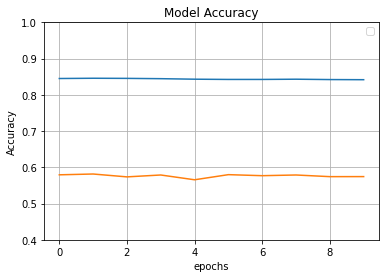

In [47]:
import ctypes
history = ctypes.cast(0x1d4ecc9c3d0,ctypes.py_object).value
fig1 = plt.gcf()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.axis(ymin = 0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend('train','validation')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_20276\2891617199.py:7: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("train","validation")
C:\Users\hp\AppData\Local\Temp\ipykernel_20276\2891617199.py:7: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("train","validation")
C:\Users\hp\AppData\Local\Temp\ipykernel_20276\2891617199.py:7: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("train","validation")
C:\Users\hp\AppData\Local\Temp\ipykernel_20276\2891617199.py:7: 

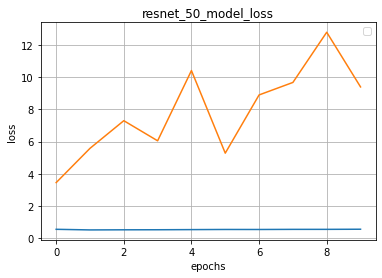

In [48]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.title("resnet_50_model_loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend("train","validation")
plt.show()

In [55]:
#opening the first video file
cap = cv2.VideoCapture('Documents/crime_images/videoplayback.mp4')
if (cap.isOpened()== False): 
    print("Error opening video stream or file")
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('Frame',frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else: 
        break
cap.release()
cv2.destroyAllWindows()

In [58]:
#opening the second video file
cap = cv2.VideoCapture('Documents/crime_images/arson_vid.mp4')
if (cap.isOpened()== False): 
    print("Error opening video stream or file")
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('Frame',frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else: 
        break
cap.release()
cv2.destroyAllWindows()

In [61]:
def resize_image(image):
    image_resized = cv2.resize(image,(64,64))
    image = np.expand_dims(image_resized,axis=0)
    return image
output_frame_pred = []
k = 100

In [81]:
cam = cv2.VideoCapture("Documents/crime_images/arson_vid.mp4")

currentframe = 0
while(True):
    ret,frame = cam.read()
    if ret:
        name = os.path.join("Documents","data","frame"+str(currentframe)+".jpg")
        print ('Creating...' + name)
        cv2.imwrite(name, frame)
        image = cv2.imread(os.path.join("Documents","data","frame"+str(currentframe)+".jpg"))
        pred = resnet_50_model.predict(resize_image(image))
        #output_class = class_names[np.argmax(pred)]
        output_frame_pred.append(pred)
        if(currentframe >= k):
            avg_pred = sum(output_frame_pred[currentframe-k:currentframe])/k
            output_class = class_names[np.argmax(avg_pred)]
            cv2.putText(frame, 
                output_class, 
                (50, 50), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, 
                (0, 255, 255), 
                2, 
                cv2.LINE_4)
        cv2.imshow('Frame',frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
        currentframe += 1
    else:
        break
cam.release()
cv2.destroyAllWindows()

Creating...Documents\data\frame0.jpg
1/1 [==============================] - 0s 45ms/step
Creating...Documents\data\frame1.jpg
1/1 [==============================] - 0s 48ms/step
Creating...Documents\data\frame2.jpg
1/1 [==============================] - 0s 41ms/step
Creating...Documents\data\frame3.jpg
1/1 [==============================] - 0s 45ms/step
Creating...Documents\data\frame4.jpg
1/1 [==============================] - 0s 47ms/step
Creating...Documents\data\frame5.jpg
1/1 [==============================] - 0s 45ms/step
Creating...Documents\data\frame6.jpg
1/1 [==============================] - 0s 48ms/step
Creating...Documents\data\frame7.jpg
1/1 [==============================] - 0s 50ms/step
Creating...Documents\data\frame8.jpg
1/1 [==============================] - 0s 39ms/step
Creating...Documents\data\frame9.jpg
1/1 [==============================] - 0s 46ms/step
Creating...Documents\data\frame10.jpg
1/1 [==============================] - 0s 47ms/step
Creating...Documents